In [7]:
import pandas as pd

data1 = pd.read_csv('../../raw/통합 테이블(공원)_2019.csv')
data2 = pd.read_csv('../../raw/지역사회건강조사 (전처리된 데이터)_2019/통합 테이블(건강)_2019.csv')
data3 = pd.read_csv('../../raw/서울시 주민등록인구 (연령별구별) 통계_2019_Q4.csv')
data2.rename(columns={'지역':'자치구'},inplace = True)
data3.set_index('자치구',inplace = True)
data3 = data3[['주민등록인구']]
df2 = data2[data2['연령별'] == '계']
df2 = df2[df2['성별'] == '계']
df2.set_index('자치구',inplace = True)
data1.set_index('자치구',inplace = True)
df = pd.concat([df2,data1,data3],axis=1)
df = df.drop(df.index[0])
df = df.drop(['연령별','성별'],axis=1)
df.reset_index(inplace=True)
df.columns

Index(['자치구', '1인당 연소득', '주관적 건강수준', '걷기 실천', '격렬한 신체활동 실천', '긍정적 태도율(자연환경)',
       '주관적 스트레스 수준', '우울감 경험률', '중등도 신체활동 실천', '체중조절 경험 여부', '행복감 지수', '공원 수',
       '행정구역면적', '공원면적', '공원율', '1인당 공원 면적', '총 도시림 면적', '생활권 도시림 면적',
       '1인당 총 도시림 면적', '1인당 생활권 도시림 면적', '1인당 생활권 도시림 면적(산림수목)',
       '1인당 생활권 도시림 면적(공원녹지)', '주민등록인구'],
      dtype='object')

In [3]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fm = mp.font_manager.FontManager()

plt.rcParams['font.family'] = 'Malgun Gothic'

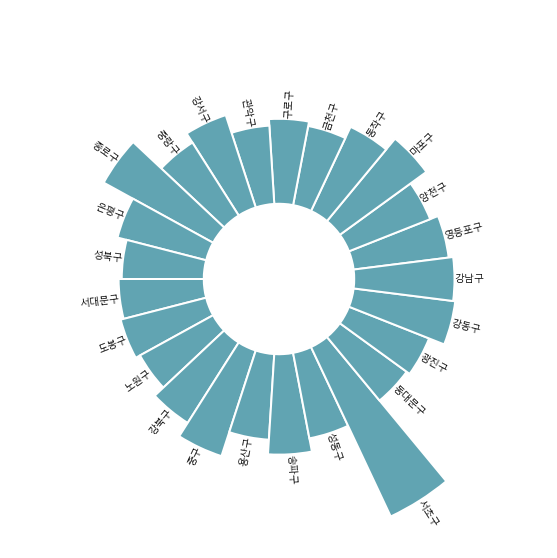

In [4]:
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 15

# Compute max and min in the dataset
max = df['1인당 생활권 도시림 면적'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df['1인당 생활권 도시림 면적'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 0

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["자치구"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

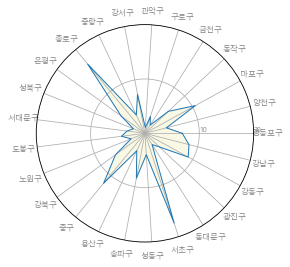

In [6]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

#df1 = df['자치구','1인당 생활권 도시림 면적']

df1 = df[['자치구','1인당 생활권 도시림 면적']].T
df2 = df1.rename(columns=df1.iloc[0])
df3 = df2.drop(df2.index[0])
df3.reset_index(inplace=True)
df3['서초구'] -= 20
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df3)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df3.loc[0].drop('index').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,20)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'y', alpha=0.1)

# Show the graph
plt.show()